<h2>Converting categorical variables using One Hot Encoding method</h2>

In [1]:
#importing libraries to be used 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("py-master/ML/5_one_hot_encoding/homeprices.csv")

In [3]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [4]:
#my categorical variables using into dummy variables using pandas method
dum = pd.get_dummies(df.town)

In [5]:
dum.head()

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [6]:
#merging the already converted data with thr existing data
merged = pd.concat([df , dum] , axis= "columns")

In [7]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [8]:
#dropping the columns with the categorical variables
final_prep = merged.drop(["town" , "robinsville"] , axis = "columns" )
final_prep

,area,price,monroe township,west windsor
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,0,0


In [9]:
#using the sklearn method 
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
X = final_prep.drop('price', axis = "columns")
X

,area,monroe township,west windsor
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,0,0


In [12]:
y = final_prep["price"]
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [13]:
model.fit(X,y)

LinearRegression()

In [14]:
model.predict([[2800 , 0 , 1]])

array([605103.20361213])

In [15]:
#getting my model accuracy
model.score(X,y)

0.9573929037221873

In [16]:
#using the sklearn one hot encoding 
from sklearn.preprocessing import LabelEncoder


In [17]:
le = LabelEncoder()

In [18]:
df_le = df
df_le.town = le.fit_transform(df_le['town'])

In [19]:
X = df_le[["town" , "area"]].values
X


array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [20]:
y = df_le.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town' , OneHotEncoder() , [0])]  , remainder = "passthrough")

In [22]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [23]:
X = X[: , 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [24]:
#creating a model
dummy_model = LinearRegression()

In [25]:
#fitting the model
dummy_model.fit(X,y)

LinearRegression()

In [26]:
#checking the model coefficient
dummy_model.coef_

array([25686.4115244 , 40013.97548914,   126.89744141])

In [27]:
#checking the model intercept
dummy_model.intercept_

209776.39217373426

<h2>Exercise using one Hot Encoding</h2>

In [28]:
#using the get_dummies mtd
df_car = pd.read_csv("py-master/ML/5_one_hot_encoding/Exercise/carprices.csv")

In [29]:
df_car.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [30]:
#general eda for checks on the datasets
df_car.value_counts()

Car Model              Mileage  Sell Price($)  Age(yrs)
Audi A5                52000    32000          5           1
                       59000    29400          5           1
                       72000    19300          6           1
                       91000    12000          8           1
BMW X5                 22500    40000          2           1
                       35000    34000          3           1
                       46000    31500          4           1
                       57000    26100          5           1
                       69000    18000          6           1
Mercedez Benz C class  59000    33000          5           1
                       67000    22000          6           1
                       79000    21000          7           1
                       83000    20000          7           1
dtype: int64

In [31]:
df_car.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [32]:
#checks for missing values
df_car.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [33]:
df_car[["Car Model" , "Mileage"]][(df_car["Mileage"] > 72000) | (df_car["Sell Price($)"] > 20000)]

,Car Model,Mileage
1,BMW X5,35000
2,BMW X5,57000
3,BMW X5,22500
4,BMW X5,46000
5,Audi A5,59000
6,Audi A5,52000
8,Audi A5,91000
9,Mercedez Benz C class,67000
10,Mercedez Benz C class,83000
11,Mercedez Benz C class,79000


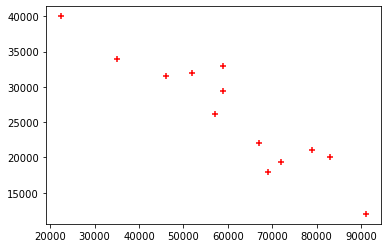

In [34]:
#check for linearity
%matplotlib inline
plt.scatter(x = df_car["Mileage"] , y = df_car["Sell Price($)"] , color ="red" , marker = "+")


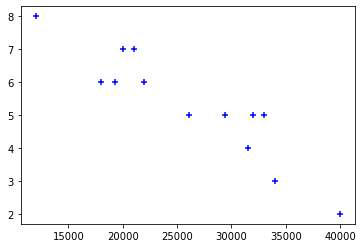

In [35]:
#checks for linearity 

plt.scatter(x = df_car["Sell Price($)"] , y = df_car["Age(yrs)"] , color = "blue" , marker = "+")

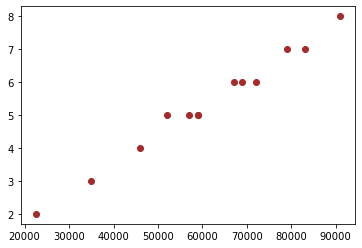

In [36]:
#checks for linearity
plt.scatter(x = df_car["Mileage"] , y = df_car["Age(yrs)"] , color = "brown" )

In [37]:
#get_dummies method converting categorical variables
df_car_dummies = pd.get_dummies(df_car["Car Model"])
df_car_dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [38]:
#merging the dummies with the real dummies 

df_car_concat = pd.concat([df_car , df_car_dummies] , axis = "columns")
df_car_concat

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [39]:
#droping the following - Car Model , Mercedez Benz C class 
df_car_concat.drop(["Car Model" , "Mercedez Benz C class"] , axis = "columns" , inplace = True)

In [40]:
df_car_concat

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [41]:
X = df_car_concat.drop("Sell Price($)" , axis = "columns")
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [42]:
y = df_car_concat.iloc[:,1]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [43]:
#lets create our models
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
 lm.fit(X,y)

LinearRegression()

In [46]:
lm.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [47]:
lm.intercept_

58976.625968537235

In [48]:
lm.score(X,y)

0.9417050937281083

In [49]:
#prediction
lm.predict([[10000 ,1, 1,0]])

array([51489.41065978])

In [50]:
#save model into a file
import pickle


In [51]:
with open("model" , "wb") as f:
    pickle.dump(lm , f)

In [52]:
with open("model" , "rb") as f:
    df_cars_file = pickle.load(f)

In [53]:
df_cars_file.predict([[0 , 1 , 0 ,0]])

array([57644.17234093])

In [54]:
#using the one hot encoding 
from sklearn.preprocessing import LabelEncoder 


In [55]:
le = LabelEncoder()
df["town"] = le.fit_transform(df["town"])

In [56]:
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [57]:
#splitting the independent variables and dependent varibles
X = df[["area" , "town"]].values
X

array([[2600,    0],
       [3000,    0],
       [3200,    0],
       [3600,    0],
       [4000,    0],
       [2600,    2],
       [2800,    2],
       [3300,    2],
       [3600,    2],
       [2600,    1],
       [2900,    1],
       [3100,    1],
       [3600,    1]], dtype=int64)

In [58]:
y = df["price"].values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [59]:
#using the one hot encoding tecniques
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [60]:
ct = ColumnTransformer([("town" , OneHotEncoder() , [0])] , remainder = "passthrough" )
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('town', OneHotEncoder(), [0])])

In [61]:
X = ct.fit_transform(X).toarray()

In [62]:
X = X[:,1:]
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [1., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 1., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 1., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.]])

In [63]:
#creating a prediction using the linear Regression

lm.fit(X,y)

LinearRegression()

In [64]:
lm.coef_

array([ 28750.,  30000.,  11250.,  50000.,  56250.,  63750., 125000.,
       171250.,  16250.])

In [65]:
lm.intercept_

553750.0000000003

In [66]:
lm.score(X,y)

0.998901921034849

<h2>Training and test split</h2>

In [82]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [70]:
#using the get_dummies mtd
df_car = pd.read_csv("py-master/ML/5_one_hot_encoding/Exercise/carprices.csv")

In [71]:
df_car.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [74]:
le = LabelEncoder()
df_car["Car Model"] = le.fit_transform(df_car["Car Model"])
df_car.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4


In [75]:
X = df_car[["Mileage" , "Car Model" , "Age(yrs)"]].values
X

array([[69000,     1,     6],
       [35000,     1,     3],
       [57000,     1,     5],
       [22500,     1,     2],
       [46000,     1,     4],
       [59000,     0,     5],
       [52000,     0,     5],
       [72000,     0,     6],
       [91000,     0,     8],
       [67000,     2,     6],
       [83000,     2,     7],
       [79000,     2,     7],
       [59000,     2,     5]], dtype=int64)

In [81]:
y  = df_car.iloc[:,2]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [83]:
ct = ColumnTransformer([("town" , OneHotEncoder() , [0])] , remainder = "passthrough")
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('town', OneHotEncoder(), [0])])

In [84]:
X = ct.fit_transform(X).toarray()

In [85]:
X

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 6.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 5.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 4.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 5.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 6.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 8.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 6.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 7.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 7.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 5.]])

In [86]:
x_train , x_test ,y_train ,y_test = train_test_split(X ,y , test_size = 0.2)

In [91]:
len(x_train)


10

In [92]:
len(x_test)

3

In [93]:
x_train

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 6.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 7.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 6.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 6.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 5.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 4.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 5.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5.]])

In [94]:
y_train

9     22000
10    20000
1     34000
7     19300
0     18000
3     40000
2     26100
4     31500
12    33000
6     32000
Name: Sell Price($), dtype: int64

In [95]:
lm = LinearRegression()

In [96]:
lm.fit(x_train , y_train)

LinearRegression()

In [97]:
lm.predict(x_test)

array([31248.55769231, 19321.39423077, 13257.21153846])

In [99]:
lm.score(x_train , y_train)

1.0

In [100]:
lm.score(x_test,y_test)

0.9483923420316588

In [98]:
y_test

5     29400
11    21000
8     12000
Name: Sell Price($), dtype: int64